In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [74]:
df=pd.read_csv('Retention CP prediction.csv')

In [75]:
df.head()

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   
3  Breakfast Foods    Frozen Foods        Food                      3.68   
4  Breakfast Foods    Frozen Foods        Food                      4.08   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                        4           Bag Stuffers   
1                   2.5944                        3  Cash Register Lottery   
2                   1.3616                        2    High Roller Savings   
3                   1.1776                        2  Cash Register Lottery   
4                   1.4280                        3       Double Down Sale   

  sales_country marital_status gender  ...  grocery_sqft frozen_sqft  \
0           USA              M      F  ...         18670        5415   
1           USA              M      M  ...         18670        5415   
2           USA              S      F  ...         18670        5415   
3           USA              M      F  ...         18670        5415   
4           USA              M      M  ...         18670        5415   

  meat_sqft coffee_bar video_store  salad_bar prepared_food  florist  \
0      3610          1           1          1             1        1   
1      3610          1           1          1             1        1   
2      3610          1           1          1             1        1   
3      3610          1           1          1             1        1   
4      3610          1           1          1             1        1   

           media_type    cost  
0  Daily Paper, Radio  126.62  
1  Daily Paper, Radio   59.86  
2  Daily Paper, Radio   84.16  
3     In-Store Coupon   95.78  
4               Radio   50.79  

[5 rows x 40 columns]

In [76]:
df.shape

(60428, 40)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

<AxesSubplot:>

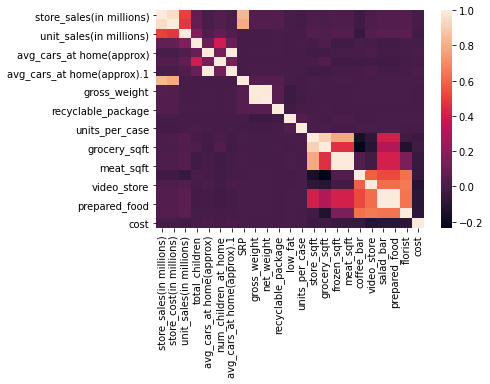

In [78]:
# EDA
corr=df.corr()
sns.heatmap(corr)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='cost', ylabel='Density'>

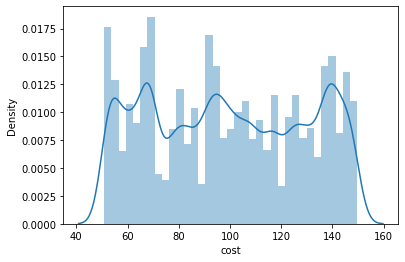

In [79]:
sns.distplot(df['cost'])

In [80]:
df.head()


food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   
3  Breakfast Foods    Frozen Foods        Food                      3.68   
4  Breakfast Foods    Frozen Foods        Food                      4.08   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                        4           Bag Stuffers   
1                   2.5944                        3  Cash Register Lottery   
2                   1.3616                        2    High Roller Savings   
3                   1.1776                        2  Cash Register Lottery   
4                   1.4280                        3       Double Down Sale   

  sales_country marital_status gender  ...  grocery_sqft frozen_sqft  \
0           USA              M      F  ...         18670        5415   
1           USA              M      M  ...         18670        5415   
2           USA              S      F  ...         18670        5415   
3           USA              M      F  ...         18670        5415   
4           USA              M      M  ...         18670        5415   

  meat_sqft coffee_bar video_store  salad_bar prepared_food  florist  \
0      3610          1           1          1             1        1   
1      3610          1           1          1             1        1   
2      3610          1           1          1             1        1   
3      3610          1           1          1             1        1   
4      3610          1           1          1             1        1   

           media_type    cost  
0  Daily Paper, Radio  126.62  
1  Daily Paper, Radio   59.86  
2  Daily Paper, Radio   84.16  
3     In-Store Coupon   95.78  
4               Radio   50.79  

[5 rows x 40 columns]

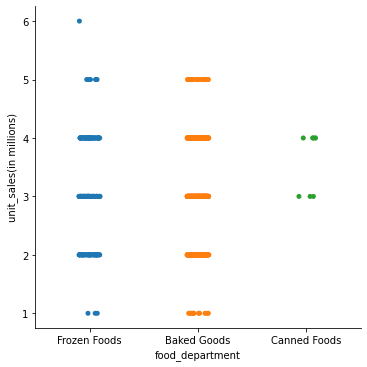

In [81]:
sns.catplot(data=df[:1000],x='food_department',y='unit_sales(in millions)')

In [82]:
df['coffee_bar'].value_counts()

1    37021
0    23407
Name: coffee_bar, dtype: int64

In [83]:
fig=px.scatter_3d(df,x='store_cost(in millions)',y='store_sales(in millions)',z='cost',color='sales_country',template='plotly_dark')
fig.show()

In [84]:
df.duplicated().value_counts()

False    60428
dtype: int64

In [85]:
df.isnull().sum().value_counts()

0    40
dtype: int64

In [86]:
num_cols=[cols for cols in df.columns if df[cols].dtypes!='O']
len(num_cols)

23

In [87]:
df.shape

(60428, 40)

In [88]:
import statistics
for col in num_cols:
    a=(df[col].max()-df[col].min())/4
    b=statistics.stdev(df[col])
    print(col, 'Estimate', a ,'std', b)

store_sales(in millions) Estimate 5.6025 std 3.463046547448736
store_cost(in millions) Estimate 2.390825 std 1.4530087091805526
unit_sales(in millions) Estimate 1.25 std 0.82767691059029
total_children Estimate 1.25 std 1.4901647863494507
avg_cars_at home(approx) Estimate 1.0 std 1.109643685749335
num_children_at_home Estimate 1.25 std 1.3034238727901337
avg_cars_at home(approx).1 Estimate 1.0 std 1.109643685749335
SRP Estimate 0.87 std 0.9328285609406958
gross_weight Estimate 3.9749999999999996 std 4.622692755103315
net_weight Estimate 4.4375 std 4.682986188514641
recyclable_package Estimate 0.25 std 0.4965506165350357
low_fat Estimate 0.25 std 0.47710968465172165
units_per_case Estimate 8.75 std 10.258554736643594
store_sqft Estimate 4844.25 std 5701.022090137213
grocery_sqft Estimate 4261.5 std 3987.3957345072804
frozen_sqft Estimate 1683.0 std 1575.9072627117132
meat_sqft Estimate 1121.75 std 1050.4716351625248
coffee_bar Estimate 0.25 std 0.4871495697856994
video_store Estimate 0.

In [89]:
cat_cols=[cols for cols in df.columns if df[cols].dtypes=="O"]
len(cat_cols)

17

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
# Models
from sklearn.tree import DecisionTreeRegressor

In [91]:
df.head()

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   
3  Breakfast Foods    Frozen Foods        Food                      3.68   
4  Breakfast Foods    Frozen Foods        Food                      4.08   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                        4           Bag Stuffers   
1                   2.5944                        3  Cash Register Lottery   
2                   1.3616                        2    High Roller Savings   
3                   1.1776                        2  Cash Register Lottery   
4                   1.4280                        3       Double Down Sale   

  sales_country marital_status gender  ...  grocery_sqft frozen_sqft  \
0           USA              M      F  ...         18670        5415   
1           USA              M      M  ...         18670        5415   
2           USA              S      F  ...         18670        5415   
3           USA              M      F  ...         18670        5415   
4           USA              M      M  ...         18670        5415   

  meat_sqft coffee_bar video_store  salad_bar prepared_food  florist  \
0      3610          1           1          1             1        1   
1      3610          1           1          1             1        1   
2      3610          1           1          1             1        1   
3      3610          1           1          1             1        1   
4      3610          1           1          1             1        1   

           media_type    cost  
0  Daily Paper, Radio  126.62  
1  Daily Paper, Radio   59.86  
2  Daily Paper, Radio   84.16  
3     In-Store Coupon   95.78  
4               Radio   50.79  

[5 rows x 40 columns]

In [93]:
X=df.drop('cost',axis=1,inplace=False)
Y=df['cost']

In [94]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)s

(48342, 39)
(12086, 39)
(48342,)
(12086,)


In [96]:
ct=ColumnTransformer([
    ('Step1',OrdinalEncoder(),cat_cols)
])

In [105]:
pipeline=Pipeline([
    ('Coltf_step',ct),
    ('Decision tree',DecisionTreeRegressor())
])

In [106]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('Coltf_step',
                 ColumnTransformer(transformers=[('Step1', OrdinalEncoder(),
                                                  ['food_category',
                                                   'food_department',
                                                   'food_family',
                                                   'promotion_name',
                                                   'sales_country',
                                                   'marital_status', 'gender',
                                                   'education', 'member_card',
                                                   'occupation', 'houseowner',
                                                   'avg. yearly_income',
                                                   'brand_name', 'store_type',
                                                   'store_city', 'store_state',
                                                   'media_type'])])),
            

In [107]:
pipeline.score(X_train,Y_train)

1.0

In [108]:
pipeline.score(X_test,Y_test)

0.9984824934696012